### Evaluation Assignment 1

DATASET URL [CLICK HERE](https://www.kaggle.com/datasets/rukenmissonnier/final-house/data)
### https://www.kaggle.com/datasets/rukenmissonnier/final-house/data

In [283]:
import pandas as pd
import numpy as np

data=pd.read_csv('house.csv')

"""
THIS IS A ONLINE DATASET TAKEN FROM KAGGLE
which is modified to suit the needs of this evaluation assignment

URL FOR DATA : https://www.kaggle.com/datasets/rukenmissonnier/final-house/data

ORIGINAL CSV format :---->
bedroom_count,net_sqm,center_distance,metro_distance,floor,age,price
1,26.18409786440993,1286.68,204.0038172983832,22,67,96004.80455671564
1,34.86690091132422,1855.25,186.9803604183612,8,30,92473.7225680616
1,36.980708990751,692.09,111.22499920528696,24,24,98112.5199416717
"""

# change center distance from metres to miles
data['center_distance']=data['center_distance']/1609.34

# change area sq meters to sq feet
data['net_sqm']=data['net_sqm']*10.7639

X=data[['bedroom_count','net_sqm','center_distance','age']]
print(X)
Y=data['price']
print(Y)

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)




      bedroom_count      net_sqm  center_distance  age
0                 1   281.843011         0.799508   67
1                 1   375.303835         1.152802   30
2                 1   398.056654         0.430046   24
3                 1   187.784019         0.869605   66
4                 1   566.048163         0.052599    3
...             ...          ...              ...  ...
4303              9  1885.475047         0.807604    5
4304              6  2318.029019         0.836591    5
4305              5  3224.476640         0.985106    5
4306              1   314.240293         1.178266    2
4307              2   585.960589         0.158599    0

[4308 rows x 4 columns]
0        96004.804557
1        92473.722568
2        98112.519942
3        92118.326874
4        98976.653176
            ...      
4303    102707.356224
4304     99695.064992
4305     93803.715617
4306     92914.729126
4307     93743.047292
Name: price, Length: 4308, dtype: float64


### Normalize the input data (X)

In [284]:
def np_normalize(X):
    return (X-X.mean())/X.std()

X_train=np_normalize(X_train)
print(X_train)
print(Y_train)
X_test=np_normalize(X_test)


      bedroom_count   net_sqm  center_distance       age
3557      -1.105708 -0.940590         0.766869  1.606438
2693       0.504549 -0.720146        -1.168560 -0.898919
3904      -0.703144 -0.862679         0.734369  0.008819
1559      -0.300580 -0.847037         1.137071  0.916557
4047      -0.703144  0.771910         0.215481 -0.354276
...             ...       ...              ...       ...
3916      -0.703144  0.546593         1.180016 -0.027490
349       -1.105708 -1.048409        -0.502491  0.880248
444       -1.105708 -1.040736         0.009499  0.008819
954       -0.703144 -0.695773         0.623809  0.154057
4201       0.907113  0.190899        -0.600528 -1.225704

[3446 rows x 4 columns]
3557     88045.934703
2693     94976.207616
3904     90838.304379
1559     90830.774654
4047    100519.920682
            ...      
3916     91651.418288
349      92818.776182
444      94880.401530
954      90840.938042
4201    104671.476067
Name: price, Length: 3446, dtype: float64


In [285]:
def np_add_ones(X):
    ones=np.ones((X.shape[0],1))
    return np.concatenate((ones,X),axis=1)

X_train=np_add_ones(X_train)

X_test=np_add_ones(X_test)

theta=np.zeros(X_train.shape[1])

def np_hypothesis(X,theta):
    return X.dot(theta)

# print(X_train,X_test,theta)

def np_cost(X,Y,theta):
    m=len(Y)
    return 1/(2*m)*np.sum((X.dot(theta)-Y)**2)

def np_gradient_descent(X,Y,theta,alpha,iterations,printing=True,convergence=True):
    m=len(Y)
    for i in range(iterations):
        #display cost at each iteration
        prev_cost=np_cost(X,Y,theta)
        theta=theta-alpha/m*X.T.dot(X.dot(theta)-Y)
        cost=np_cost(X,Y,theta)
        # use convergence criteria to break the loop that is less than 0.002% change in cost
        percentage_change=(prev_cost-cost)/prev_cost
        if convergence:
            if percentage_change<0.00002:
                if printing:
                    print("Converged at iteration ",i)
                    print("Final Iteration: ",i," Cost: ",cost," Prev Cost: ",prev_cost," Percentage Change: ",percentage_change)
                break
        if i%100==0:
            if printing:
                print("Iteration: ",i," Cost: ",cost)
    return theta

theta=np_gradient_descent(X_train,Y_train,theta,0.001,10000)



Iteration:  0  Cost:  4579712731.473103
Iteration:  100  Cost:  3749265065.613042
Iteration:  200  Cost:  3069538199.7419662
Iteration:  300  Cost:  2513163206.2802844
Iteration:  400  Cost:  2057745102.9793432
Iteration:  500  Cost:  1684957690.6218038
Iteration:  600  Cost:  1379803471.5392694
Iteration:  700  Cost:  1130008435.995216
Iteration:  800  Cost:  925527064.2891271
Iteration:  900  Cost:  758137420.5722313
Iteration:  1000  Cost:  621109904.2837653
Iteration:  1100  Cost:  508936233.88203037
Iteration:  1200  Cost:  417107692.23783576
Iteration:  1300  Cost:  341933666.6605751
Iteration:  1400  Cost:  280393152.60312927
Iteration:  1500  Cost:  230013226.5293694
Iteration:  1600  Cost:  188769585.43719056
Iteration:  1700  Cost:  155005143.04996073
Iteration:  1800  Cost:  127363402.32839309
Iteration:  1900  Cost:  104733920.5545244
Iteration:  2000  Cost:  86207671.13965565
Iteration:  2100  Cost:  71040505.37142304
Iteration:  2200  Cost:  58623243.7578088
Iteration:  2

### NOW WE CAN SEE THE FINAL iteration and net cost of the model
### <font color="red">now we will do some hypertuning to see if performance can be improved</font>

In [286]:
### hypertuning the learning rate and iterations
alpha=[0.001,0.01]
iterations=[10,100,500,1000,5000]
# get best alpha and iterations
best_alpha,best_iterations,best_cost,best_theta=0,0,float('inf'),np.zeros(X_train.shape[1])
for a in alpha:
    for i in iterations:
        curr_theta=np.zeros(X_train.shape[1])
        curr_theta=np_gradient_descent(X_train,Y_train,curr_theta,a,i,False,False)
        print("Alpha: ",a," Iterations: ",i," Cost: ",np_cost(X_train,Y_train,curr_theta))
        if np_cost(X_train,Y_train,curr_theta)<best_cost:
            best_cost=np_cost(X_test,Y_test,curr_theta)
            best_theta=curr_theta
            best_alpha=a
            best_iterations=i
print("Old Alpha: ",0.001," Old Iterations: ",10000," Old Cost: ",np_cost(X_train,Y_train,theta))
print("Best Alpha: ",best_alpha," Best Iterations: ",best_iterations," Best Cost: ",best_cost)
# cost of current theta
print("cost of current theta: ",np_cost(X_train,Y_train,theta))
theta=best_theta
print("cost of best theta: ",np_cost(X_train,Y_train,theta))

Alpha:  0.001  Iterations:  10  Cost:  4497976737.134068


Alpha:  0.001  Iterations:  100  Cost:  3756773178.3323035
Alpha:  0.001  Iterations:  500  Cost:  1688328226.9306433
Alpha:  0.001  Iterations:  1000  Cost:  622348868.7204531
Alpha:  0.001  Iterations:  5000  Cost:  2720053.660480862
Alpha:  0.01  Iterations:  10  Cost:  3753366424.72222
Alpha:  0.01  Iterations:  100  Cost:  616754001.1162586
Alpha:  0.01  Iterations:  500  Cost:  2710802.30201473
Alpha:  0.01  Iterations:  1000  Cost:  2487185.3039937983
Alpha:  0.01  Iterations:  5000  Cost:  2484762.3054044656
Old Alpha:  0.001  Old Iterations:  10000  Old Cost:  2522121.379447399
Best Alpha:  0.01  Best Iterations:  5000  Best Cost:  2695346.7881159848
cost of current theta:  2522121.379447399
cost of best theta:  2484762.3054044656


In [287]:
print(theta)

[95719.64296689   212.40978521  2522.08883521 -1606.77581283
  -732.21698266]


### testing the model with the given data

In [288]:
X_test.dot(theta)

def MSE(Y,Y_pred):
    return np.mean((Y-Y_pred)**2)

Y_pred=X_test.dot(theta)
print("Cost : ",MSE(Y_test,Y_pred))
# print y_test and y_pred and difference one by one in table
print(pd.DataFrame({'Y_test':Y_test,'Y_pred':Y_pred,'diff':Y_test-Y_pred}))

Cost :  5390693.5762319695
             Y_test         Y_pred         diff
3421  100603.749937   99858.385581   745.364357
2730   96943.686476   96709.531835   234.154640
3604   90889.001322   91378.219888  -489.218566
1417   95333.227312   95099.393956   233.833356
1493   93382.249920   94658.357041 -1276.107121
...             ...            ...          ...
982    90835.808056   92949.828906 -2114.020850
1460   95474.254973   94084.570264  1389.684709
3262  101171.043930  100082.091569  1088.952361
2434  104129.229119  101717.750557  2411.478562
419    91180.183404   92068.202147  -888.018743

[862 rows x 3 columns]


### check sample input

In [289]:
# get the price prediction for size 2500 sqft, 4 bedrooms, 5 miles from center, 10 years old
# contruct the sample
# add 1 to the beginning
# normalize
# dot product with theta
sample=np.array([1,4,2500,5,10])
sample[1:]=np_normalize(sample[1:])
print("Sample data House Price : ",sample.dot(theta))

Sample data House Price :  98241.73180210123


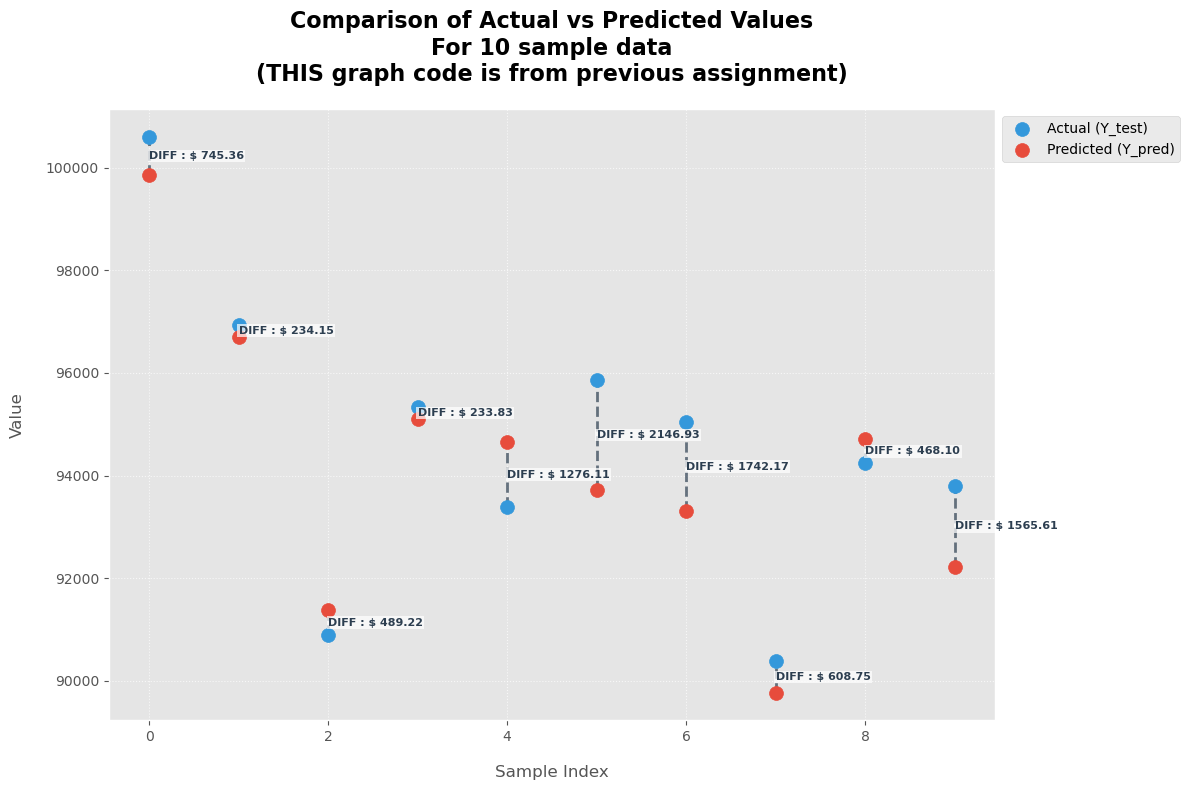

In [290]:
import matplotlib.pyplot as plt

def plot_regression_comparison(Y_test, Y_pred, count=10):
    plt.figure(figsize=(12, 8))
    
    x = np.arange(count)
    
    # Ensure Y_test and Y_pred are pandas Series
    Y_test = pd.Series(Y_test)
    Y_pred = pd.Series(Y_pred)
    
    # Plot actual values
    plt.scatter(x, Y_test.iloc[:count], color='#3498db', s=100, label='Actual (Y_test)', zorder=2)
    
    # Plot predicted values
    plt.scatter(x, Y_pred.iloc[:count], color='#e74c3c', s=100, label='Predicted (Y_pred)', zorder=2)
    
    # Plot vertical lines to show the gap and add delta labels
    for i in range(count):
        y_test = Y_test.iloc[i]
        y_pred = Y_pred.iloc[i]
        y_min = min(y_test, y_pred)
        y_max = max(y_test, y_pred)
        plt.vlines(x=i, ymin=y_min, ymax=y_max, 
                   color='#2c3e50', linestyle='--', alpha=0.7, linewidth=2, zorder=1)
        
        # Calculate and display delta
        delta = abs(y_test - y_pred)
        plt.text(i, (y_min + y_max) / 2, f'DIFF : $ {delta:.2f}', 
                 horizontalalignment='left', verticalalignment='center',
                 fontsize=8, color='#2c3e50', fontweight='bold',
                 bbox=dict(facecolor='white', edgecolor='none', alpha=0.7, pad=1))

    plt.title('Comparison of Actual vs Predicted Values\nFor 10 sample data\n(THIS graph code is from previous assignment)', fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Sample Index', fontsize=12, labelpad=15)
    plt.ylabel('Value', fontsize=12, labelpad=15)
    
    plt.legend(fontsize=10, loc='upper left', bbox_to_anchor=(1, 1))
    
    plt.grid(True, linestyle=':', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Assuming Y_test and Y_pred are already defined
plot_regression_comparison(Y_test, Y_pred)